<h1 style="font-size:3rem;color:orange;">Predicting Loan E-Signatures 🖆</h1>

<h2 style="font-size:2rem;color:orange;">EDA (Exploratory Data Analysis) and Feature Engineering</h2>

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

### Import Data

In [2]:
df_users_financial = pd.read_csv("../data/raw/P39-Financial-Data.csv")

### Raw Data Peek 👀

In [3]:
df_users_financial.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
df_users_financial.dtypes

entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

In [5]:
df_users_financial.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


# Data Cleaning 🧽

Here we note our data has been provided to us from the P2P marketplace partner and we anticipate it to have been previously processed

In [6]:
# Assess the DataFrame for missing or null values
df_users_financial.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [7]:
# Modify the name of the income column for clarity
df_users_financial.rename(columns={'income': 'monthly_income'}, inplace=True)

# Plotting

In [8]:
# Get numerical features 
df_users_numerical = df_users_financial.copy().drop(columns = ['entry_id', 'pay_schedule', 'home_owner', 'has_debt', 'e_signed'])

df_users_numerical.head()

,age,monthly_income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,40,3135,0,3,3,6,2,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10
1,61,3180,0,6,3,2,7,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
2,23,1540,6,0,0,7,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
3,40,5230,0,6,1,2,7,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
4,33,3590,0,5,2,2,8,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12


In [9]:
# Get categorical features 
df_users_categorical = df_users_financial[['pay_schedule', 'home_owner', 'has_debt']].copy()

df_users_categorical.head()

,pay_schedule,home_owner,has_debt
0,bi-weekly,1,1
1,weekly,0,1
2,weekly,0,1
3,bi-weekly,0,1
4,semi-monthly,0,1


### Histograms

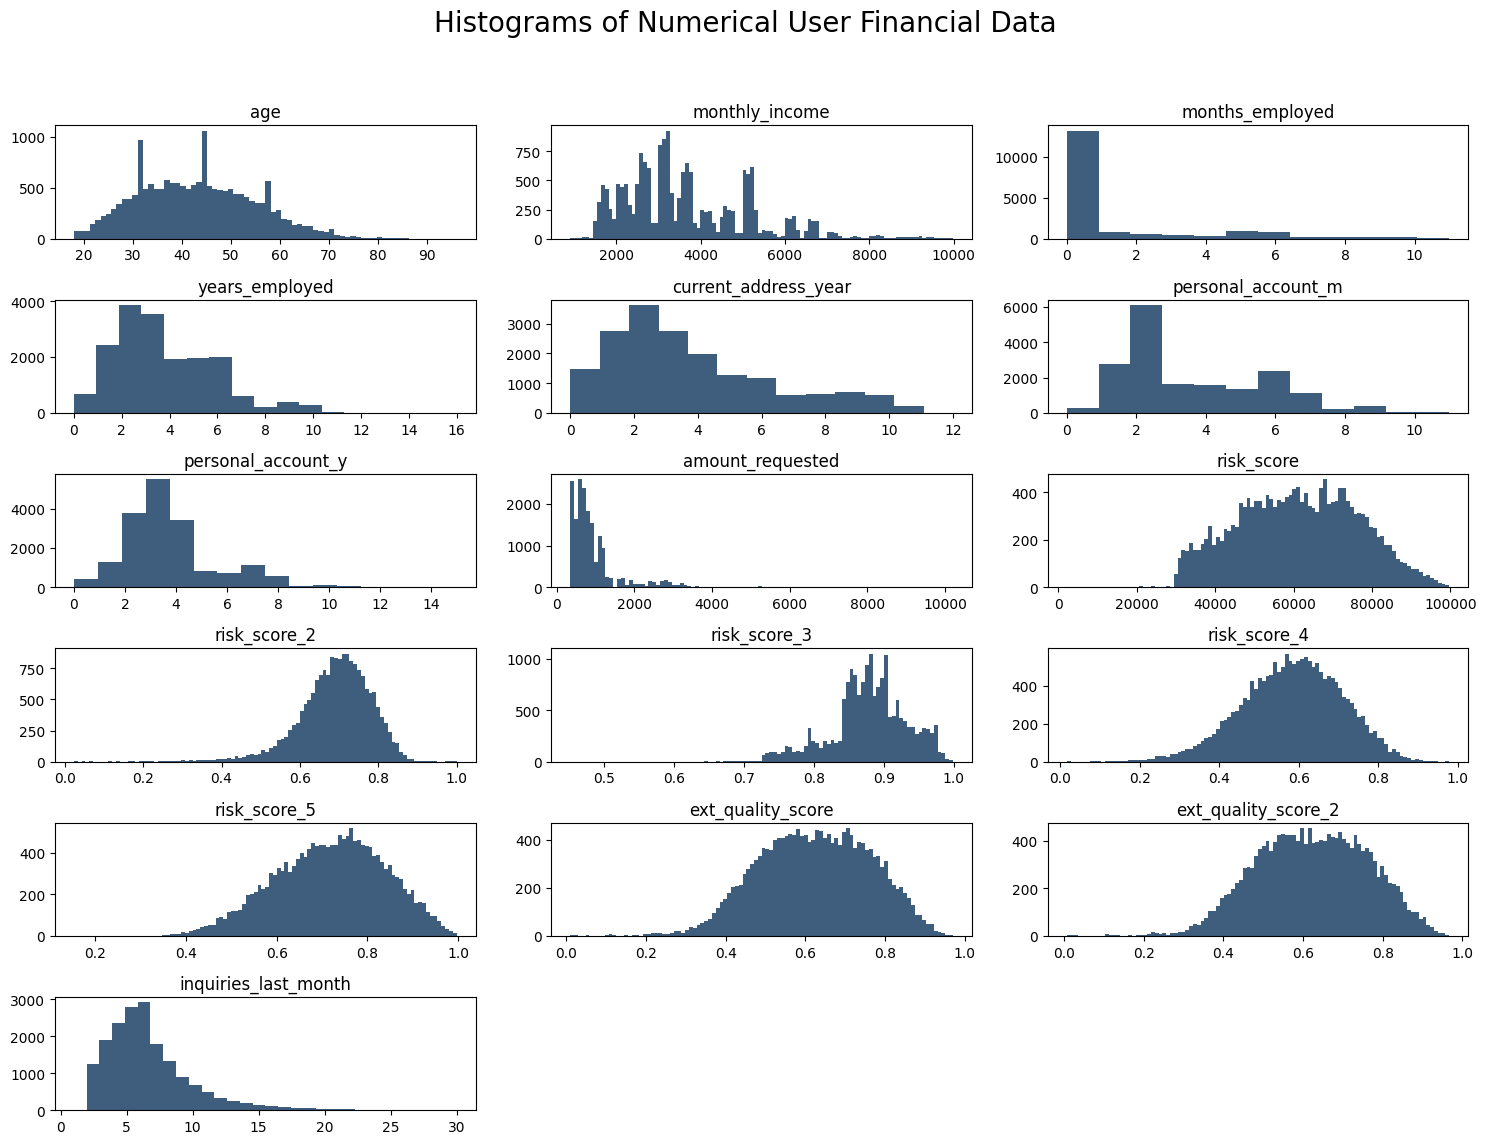

In [10]:
# Set figure size
plt.figure(figsize=(15, 12))

# Set title
plt.suptitle('Histograms of Numerical User Financial Data', fontsize = 20)

for col in range(df_users_numerical.shape[1]):
    plt.subplot(6, 3, col + 1)
    feat = plt.gca()
    feat.set_title(df_users_numerical.columns.values[col])
    values = np.size(df_users_numerical.iloc[:, col].unique())
    # If more than 100 unique values (e.g. risk scores), the number of bins falls to 100
    if values >= 100:
        values = 100
    plt.hist(df_users_numerical.iloc[:, col], bins=values, color='#3F5D7D')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Above we note that months_employed is almost always 0, suggesting all users have worked in their current positions for exactly 1 year, 2 years, etc. This suggests that months_employed may not be accurate. As expected, most risk scores generated by the financial engineering teams follow a fairly normal distribution. 

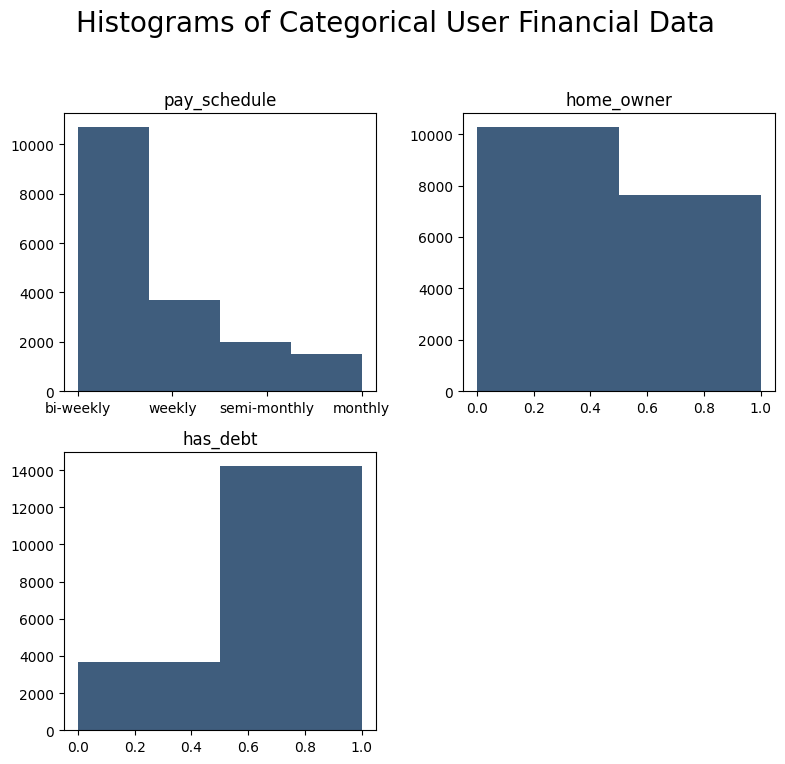

In [11]:
# Set figure size
plt.figure(figsize=(8, 8))

# Set title
plt.suptitle('Histograms of Categorical User Financial Data', fontsize = 20)

# Create subplots with increased spacing
plt.subplots_adjust(hspace=0.5, wspace=0.7)

for col in range(1, df_users_categorical.shape[1]+1):
    plt.subplot(2, 2, col)
    feat = plt.gca()
    feat.set_title(df_users_categorical.columns.values[col-1])
    vals = np.size(df_users_categorical.iloc[:, col-1].unique())
    plt.hist(df_users_categorical.iloc[:, col - 1], bins=vals, color='#3F5D7D')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Label Distribution

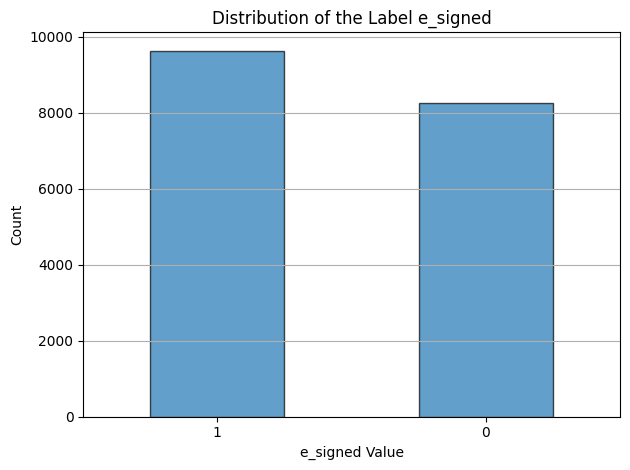

In [12]:
# Count the occurrences of each value
value_counts = df_users_financial['e_signed'].value_counts()

# Create a bar plot
value_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Distribution of the Label e_signed')
plt.xlabel('e_signed Value')
plt.ylabel('Count')
plt.xticks(rotation=0)  # keep x-axis labels horizontal
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Boxplots

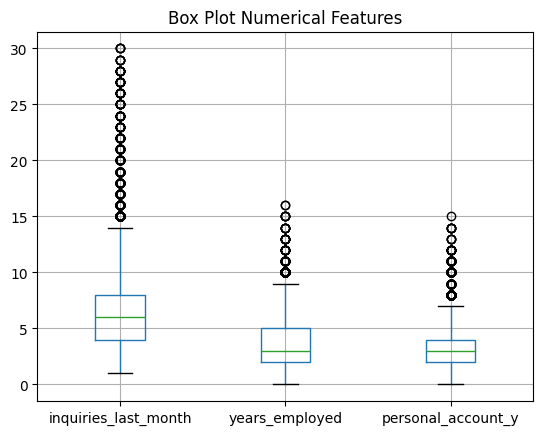

In [13]:
# Create box plots for numerical features
df_users_numerical.boxplot(column = ['inquiries_last_month', 'years_employed', 'personal_account_y'])
plt.title("Box Plot Numerical Features")
plt.show()

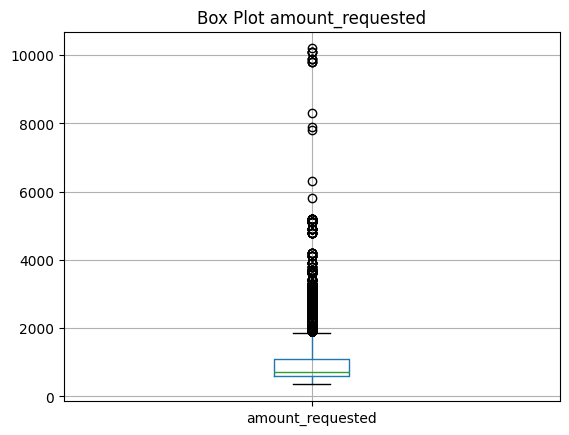

In [14]:
# Box plot for amount requested
df_users_numerical.boxplot(column = ['amount_requested'])
plt.title("Box Plot amount_requested")
plt.show()

- A decision is made to keep outliers in the amount_requested in place as the data is estimated to be genuine

### Correlation Plots

We note these estimated correlations are linear in nature and may not represent the correlations found within nonlinear models

<Axes: title={'center': 'Numerical Features Estimated Correlation with E-Signed'}>

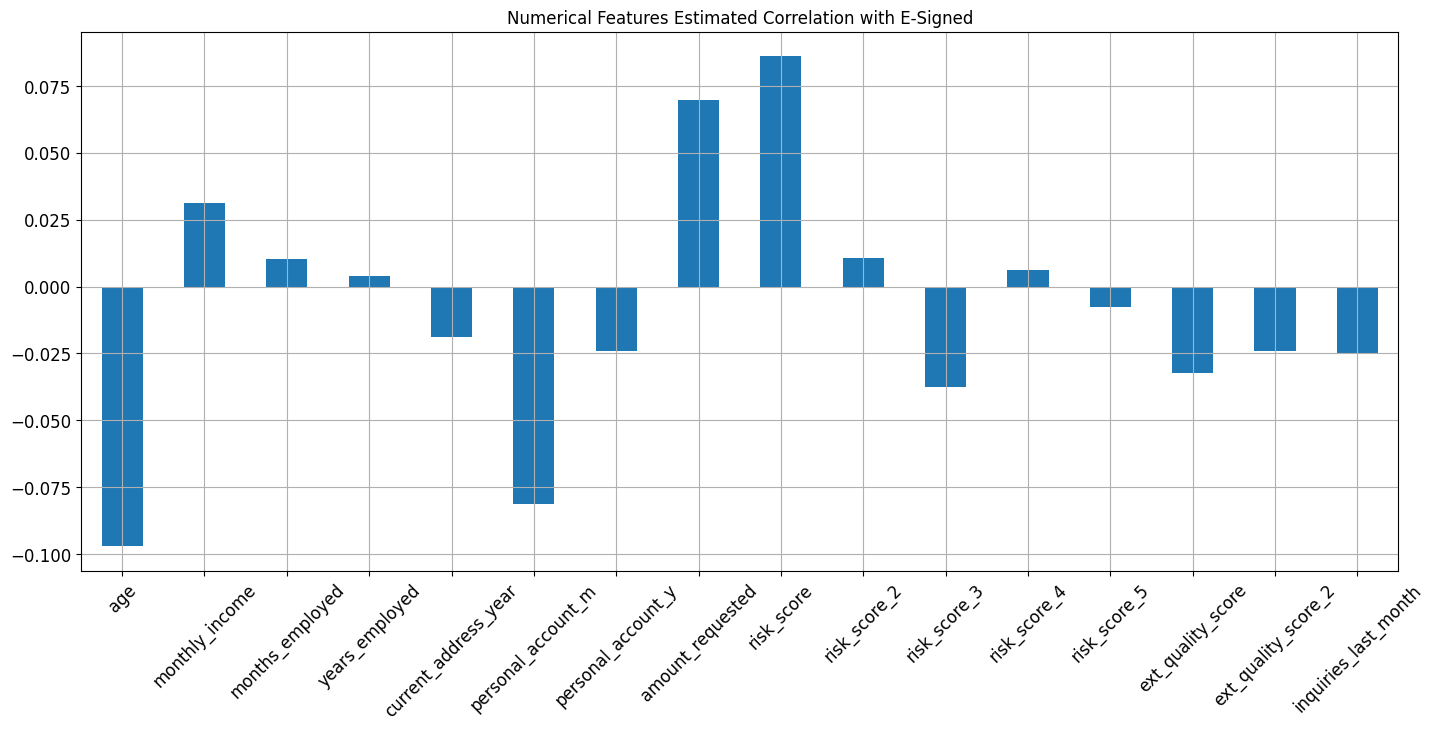

In [15]:
# Estimate and plot numerical features correlation with the label 'e_signed'
df_users_numerical.corrwith(df_users_financial['e_signed']).plot.bar(
    figsize = (17, 7), 
    title = "Numerical Features Estimated Correlation with E-Signed", 
    fontsize = 12, 
    rot = 45, 
    grid = True
    )

<Axes: title={'center': 'Categorical Features Estimated Correlation with E-Signed'}>

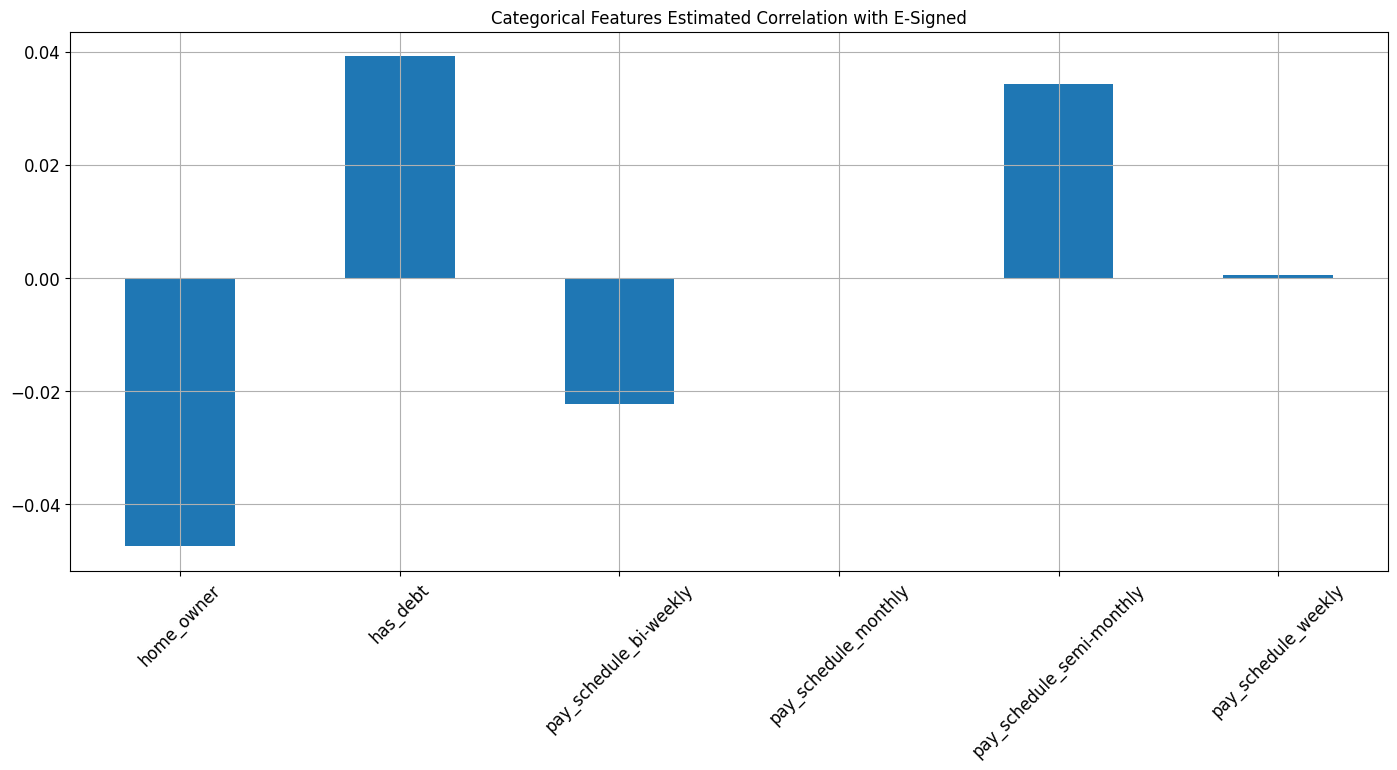

In [16]:
# Temporary one-hot encoding of 'pay_schedule' for analysis
df_users_categorical_ohe = pd.get_dummies(df_users_categorical)

# Estimate and plot categorical features correlation with the label 'e_signed'
df_users_categorical_ohe.corrwith(df_users_financial['e_signed']).plot.bar(
    figsize = (17, 7), 
    title = "Categorical Features Estimated Correlation with E-Signed", 
    fontsize = 12, 
    rot = 45, 
    grid = True
    )

### Correlation Matrix

Estimate fields that are positively and negatively correlated to each other, checking for linear dependence

<Axes: >

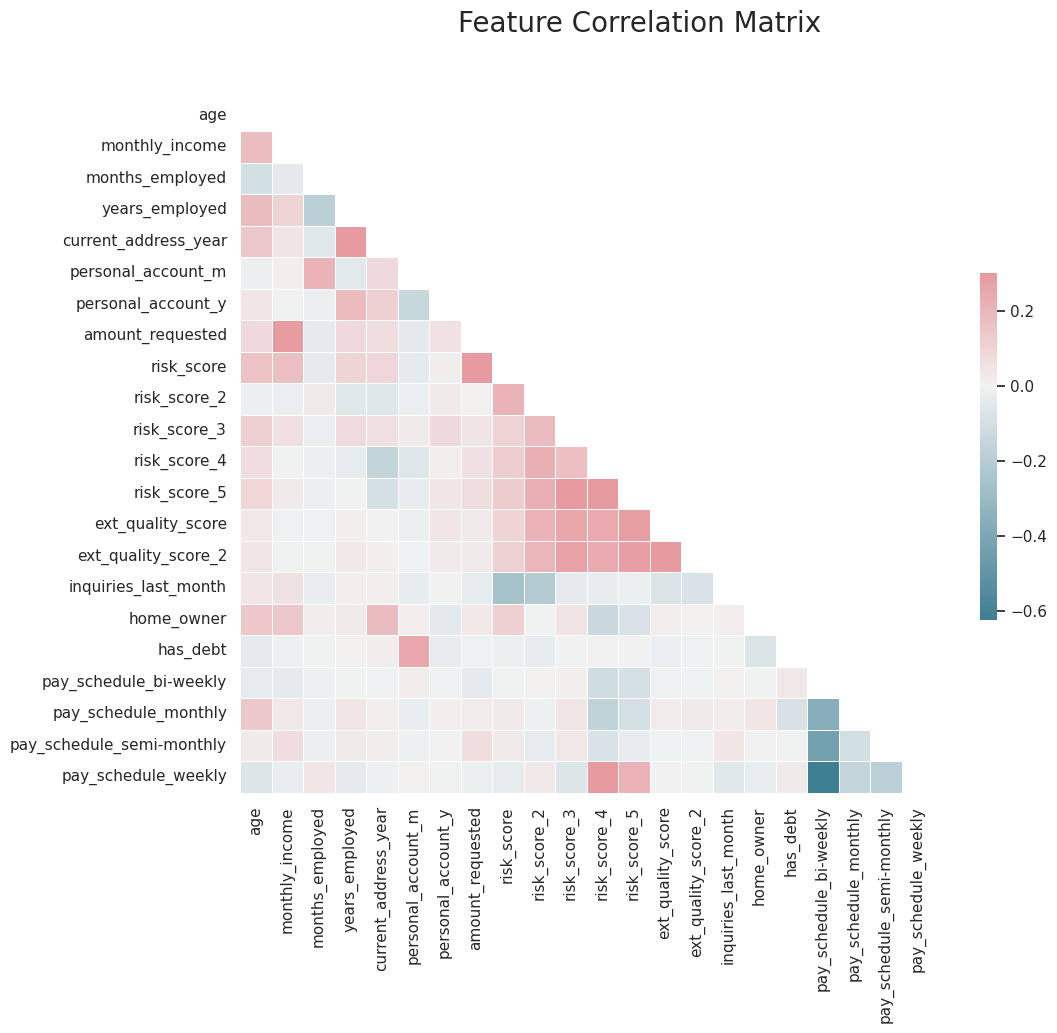

In [17]:
# Combine our feature DataFrames horizontally
df_features_combined_ohe = pd.concat([df_users_numerical, df_users_categorical_ohe], axis=1, join='outer')
df_features_combined = pd.concat([df_users_numerical, df_users_categorical], axis=1, join='outer')

# Seaborn
sn.set(style="white")

# Compute the correlation matrix
corr = df_features_combined_ohe.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Setup the matplotlib figure 
f, ax = plt.subplots(figsize=(12, 9))
f.suptitle('Feature Correlation Matrix', fontsize = 20)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We note the elevated correlation between risk scores. It follows that despite the different metrics that were used to generate these scores, if a user is rated as high risk in one area, they are likely to be rated as high risk in others as well. The negative correlation between pay schedules is anticipated.

## Feature Engineering ⚒️

### Filtering

In [18]:
# Remove months_employed which we found likely to contain inaccurate data
df_features_combined = df_features_combined.drop(columns = ['months_employed'])

### Aggregate Data

- Personal Credit Account

In [19]:
# Create a field that reflects the total time since the user created the personal credit account
df_features_combined['personal_account_months'] = (df_features_combined.personal_account_m + (df_features_combined.personal_account_y * 12))

# Display results
df_features_combined[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [20]:
# Remove the previously combined fields
df_features_combined.drop(columns = ['personal_account_m', 'personal_account_y'], inplace=True)

- Risk Scores

In [21]:
df_features_processed = df_features_combined.copy()

columns_to_average = ['risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5']

# Create a column that represents the average of the additional 4 risk scores
df_features_processed['avg_risk_score'] = df_features_processed[columns_to_average].mean(axis=1)

# Drop the columns that have been averaged
df_features_processed.drop(columns=columns_to_average, inplace=True)

- External Quality Scores

In [22]:
columns_to_average = ['ext_quality_score', 'ext_quality_score_2']

# Create a column that represents the average of the two external quality scores
df_features_processed['avg_ext_quality_score'] = df_features_processed[columns_to_average].mean(axis=1)

# Drop the columns that have been averaged
df_features_processed.drop(columns=columns_to_average, inplace=True)

df_features_processed.head()

,age,monthly_income,years_employed,current_address_year,amount_requested,risk_score,inquiries_last_month,pay_schedule,home_owner,has_debt,personal_account_months,avg_risk_score,avg_ext_quality_score
0,40,3135,3,3,550,36200,10,bi-weekly,1,1,30,0.661151,0.480918
1,61,3180,6,3,600,30150,9,weekly,0,1,86,0.789841,0.680720
2,23,1540,0,0,450,34550,7,weekly,0,1,19,0.691712,0.531712
3,40,5230,6,1,700,42150,8,bi-weekly,0,1,86,0.793179,0.692552
4,33,3590,5,2,1100,53850,12,semi-monthly,0,1,98,0.688483,0.744634


In [23]:
# Return entry_id and e_signed to the processed DataFrame
df_features_processed.insert(0, 'entry_id', df_users_financial.entry_id)
df_features_processed['e_signed'] = df_users_financial.e_signed

## Save Dataset 💾

In [24]:
import os

# Create a directory to save results if it doesn't exist
directory = "../data/processed"
if not os.path.exists(directory):
    os.makedirs(directory)

df_features_processed.to_csv("../data/processed/new_P39-Financial-Data.csv", index = False)